In [ ]:
# READ DRONE SAMPLE

In [60]:
from moviepy import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os
from pathlib import Path

In [62]:
downloads_path = Path.home()
mp4_path = downloads_path / 'Downloads' / 'shahed-drones.mp4'
    
size_mb = mp4_path.stat().st_size / (1024 * 1024)
print(f"File size: {size_mb:.2f} MB")
print(f"Full path: {mp4_path}")  

File size: 0.86 MB
Full path: /Users/roksolanadiachuk/Downloads/shahed-drones.mp4


In [95]:
mp4_video_path = downloads_path / 'Downloads' / 'shahed-hit-video.mp4'
    
size_mb_video = mp4_video_path.stat().st_size / (1024 * 1024)
print(f"File size: {size_mb_video:.2f} MB")
print(f"Full path: {mp4_video_path}")  

File size: 1.26 MB
Full path: /Users/roksolanadiachuk/Downloads/shahed-hit-video.mp4


In [74]:
import subprocess
import librosa
import numpy as np

In [77]:
def extract_audio_from_mp4(mp4_path, output_wav=None):
    """
    Extract audio from MP4 file into numpy array + sample rate.
    Uses ffmpeg + librosa for more reliable handling.
    """
    if output_wav is None:
        output_wav = "temp_audio.wav"

    # Extract audio using ffmpeg
    cmd = [
        "ffmpeg", "-i", str(mp4_path),
        "-vn",             # no video
        "-ac", "1",        # mono
        "-ar", "16000",    # sample rate
        "-y",              # overwrite
        output_wav
    ]
    subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    # Load with librosa
    audio_array, sr = librosa.load(output_wav, sr=None)

    print(f"✅ Audio extracted:")
    print(f"  - Shape: {audio_array.shape}")
    print(f"  - Sample rate: {sr}")

    return audio_array, sr

In [78]:
audio_data, sr = extract_audio_from_mp4(mp4_path, 'shahed_audio.wav')

✅ Audio extracted:
  - Shape: (884395,)
  - Sample rate: 16000


In [96]:
video_file_audio, sr2 = extract_audio_from_mp4(mp4_video_path, 'shahed_hit_video.wav')

✅ Audio extracted:
  - Shape: (334739,)
  - Sample rate: 16000


In [105]:
seven_secs_audio = video_file_audio[:5 * sr2]

In [79]:
import matplotlib.pyplot as plt

In [100]:
# Time axis in seconds
def plot_waveform(audio_array, sr): 
    time_axis = np.linspace(0, len(audio_array) / sr, num=len(audio_array))

    plt.figure(figsize=(14, 4))
    plt.plot(time_axis, audio_array)
    plt.title("Waveform of Shahed Drone Audio")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


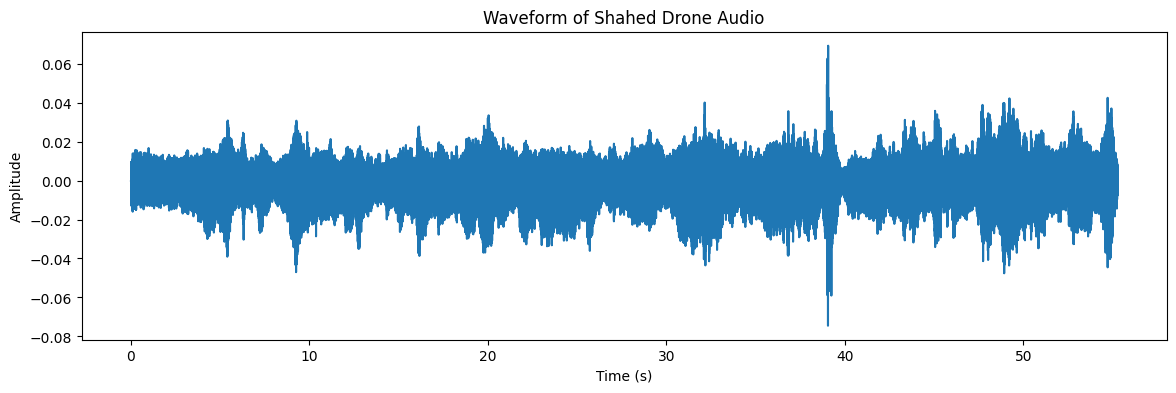

In [101]:
plot_waveform(audio_data, sr)

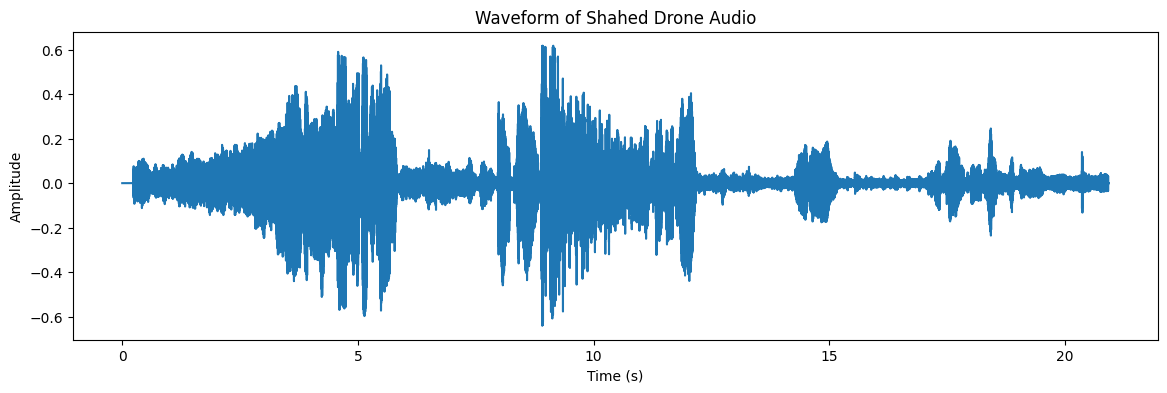

In [102]:
plot_waveform(video_file_audio, sr2)

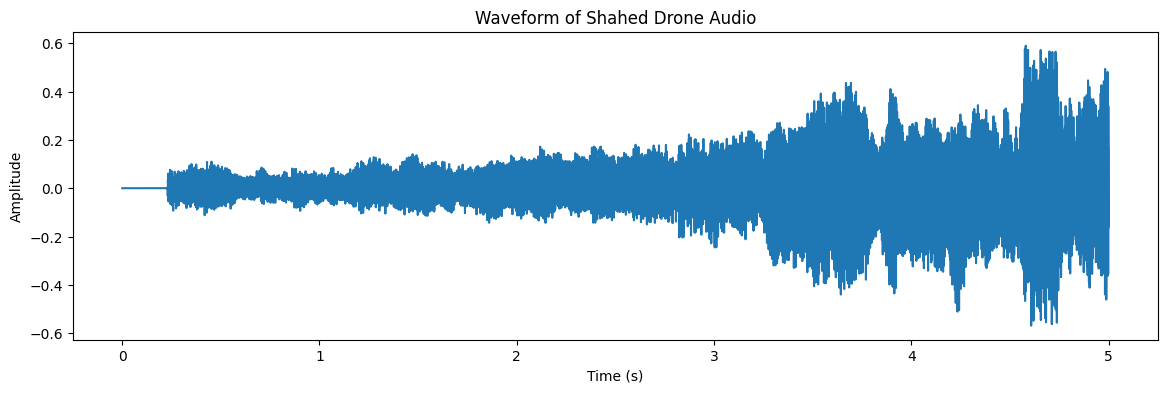

In [106]:
plot_waveform(seven_secs_audio, sr2)

In [108]:
# Compute FFT
def compute_fft(audio_array, sr):
    fft_spectrum = np.fft.rfft(audio_array)
    freqs = np.fft.rfftfreq(len(audio_array), d=1/sr)

    plt.figure(figsize=(14, 4))
    plt.semilogy(freqs, np.abs(fft_spectrum))  # log scale for clarity
    plt.title("Frequency Spectrum of Shahed Drone Sound")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (log scale)")
    plt.show()

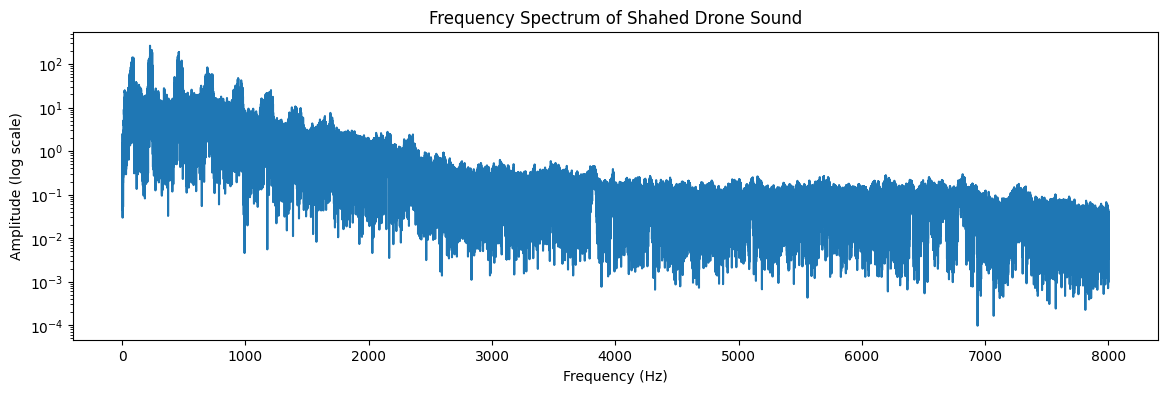

In [109]:
compute_fft(audio_data, sr)

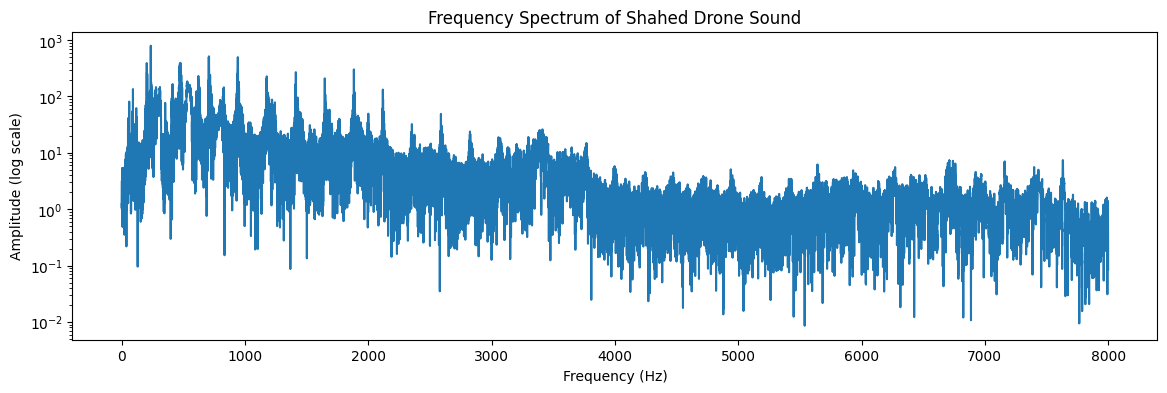

In [110]:
compute_fft(seven_secs_audio, sr2)

In [82]:
import librosa.display

In [111]:
# Compute spectrogram (STFT)
def compute_spectrogram(audio_array, sr):
    S = librosa.stft(audio_array)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    plt.figure(figsize=(14, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(label='dB')
    plt.title("Spectrogram of Shahed Drone Audio")
    plt.show()

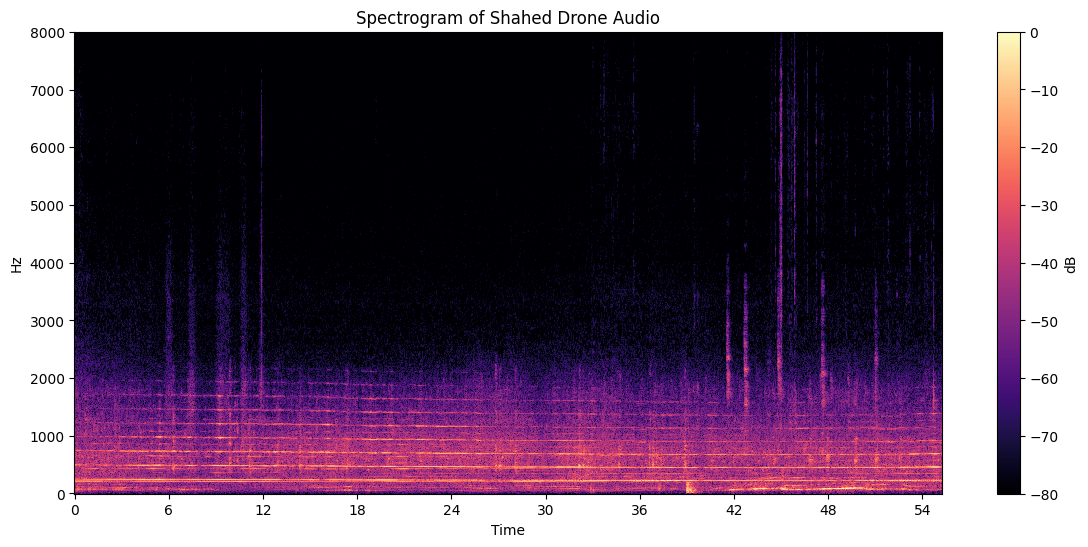

In [112]:
compute_spectrogram(audio_data, sr)

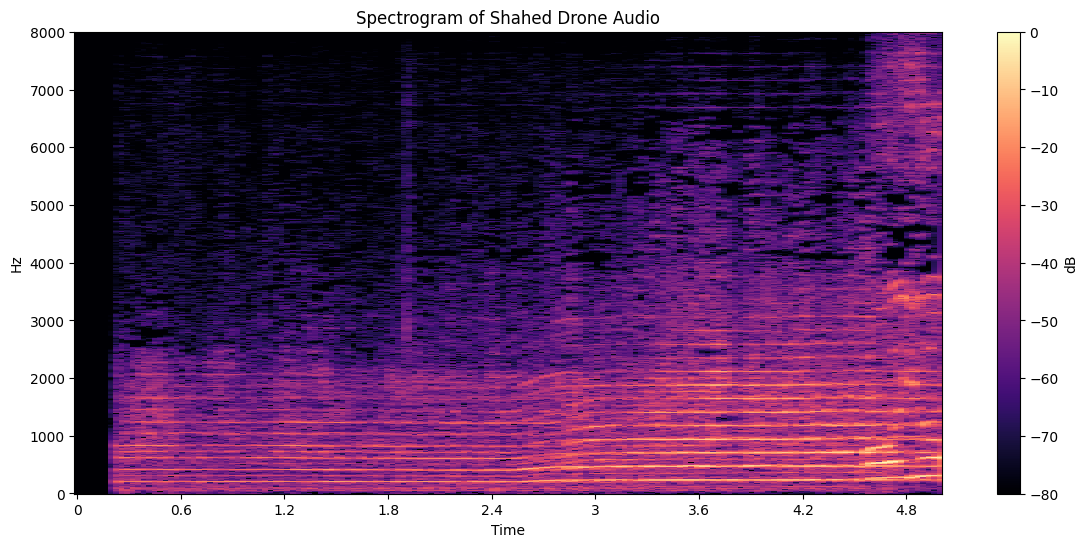

In [113]:
compute_spectrogram(seven_secs_audio, sr2)

In [115]:
# Compute MEL spectrogram
def compute_mel_spectrogram(audio_array, sr):
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_mels=128, fmax=8000)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(label='dB')
    plt.title("Mel-Spectrogram of Shahed Drone Audio")
    plt.show()

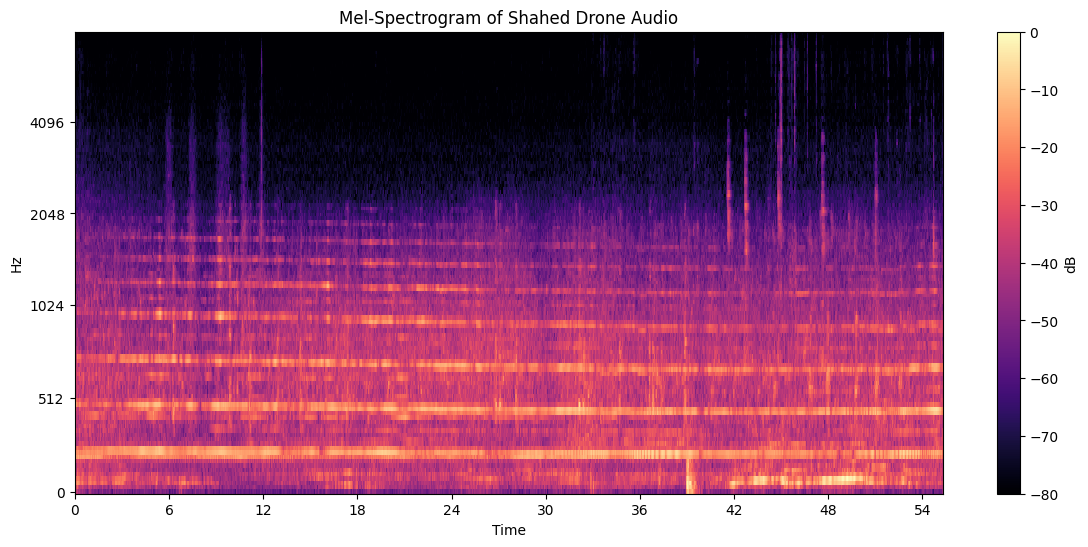

In [116]:
compute_mel_spectrogram(audio_data, sr)

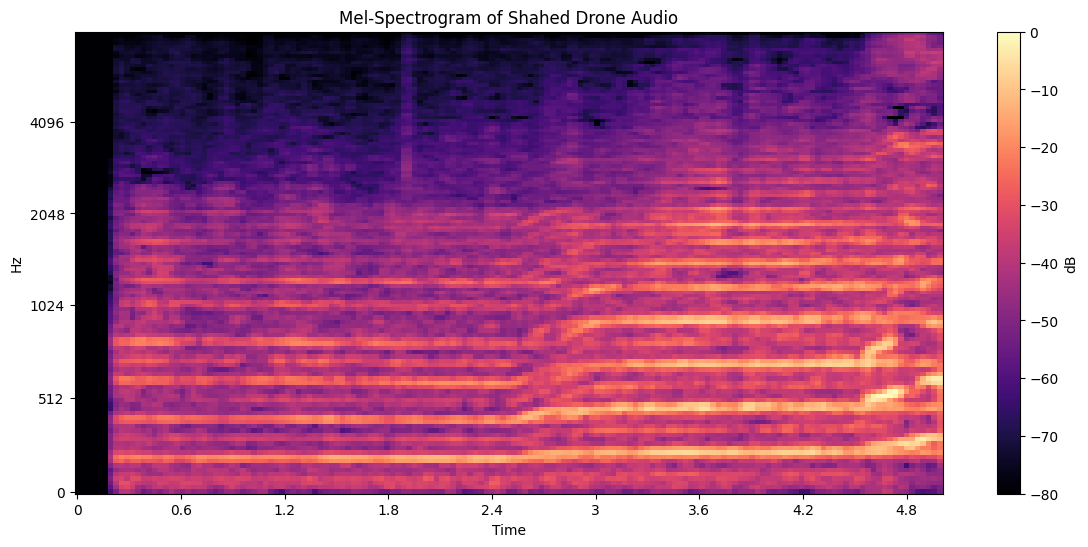

In [117]:
compute_mel_spectrogram(seven_secs_audio, sr2)

In [90]:
# SAVE MEL SPECTOGRAMS AS PNG

In [91]:
def save_mel_spectrogram(audio_array, sr, output_path, 
                         n_mels=128, fmax=8000, dpi=100):
    """
    Generate and save Mel-spectrogram as PNG
    """
    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio_array, sr=sr, n_mels=n_mels, fmax=fmax
    )
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot and save
    plt.figure(figsize=(4, 4))  # square shape is best for CNNs
    librosa.display.specshow(mel_db, sr=sr, x_axis=None, y_axis=None, cmap="magma")
    plt.axis("off")  # remove axes for clean image
    plt.tight_layout(pad=0)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path, dpi=dpi, bbox_inches="tight", pad_inches=0)
    plt.close()

    print(f"✅ Saved Mel-spectrogram to {output_path}")

In [92]:
save_mel_spectrogram(audio_data, sr, "spectrograms/shahed_drone.png")

✅ Saved Mel-spectrogram to spectrograms/shahed_drone.png


In [118]:
save_mel_spectrogram(seven_secs_audio, sr2, "spectrograms/shahed_drone_7_secs.png")

✅ Saved Mel-spectrogram to spectrograms/shahed_drone_7_secs.png


In [86]:
# CUT THE AUDIO FILE INTO 10 SECONDS SAMPLES

In [93]:
def segment_and_save(audio_array, sr, segment_length=10, out_dir="spectrograms"):
    """
    Split audio into fixed-length segments and save Mel-spectrograms for each.
    """
    samples_per_segment = segment_length * sr
    total_samples = len(audio_array)
    num_segments = total_samples // samples_per_segment

    os.makedirs(out_dir, exist_ok=True)

    for i in range(num_segments):
        start = i * samples_per_segment
        end = start + samples_per_segment
        segment = audio_array[start:end]

        filename = os.path.join(out_dir, f"segment_{i+1}.png")
        save_mel_spectrogram(segment, sr, filename)

In [94]:
segment_and_save(audio_data, sr, segment_length=10, out_dir="spectrograms/shahed")

✅ Saved Mel-spectrogram to spectrograms/shahed/segment_1.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_2.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_3.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_4.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_5.png


In [121]:
segment_and_save(seven_secs_audio, sr2, segment_length=1, out_dir="spectrograms/shahed")

✅ Saved Mel-spectrogram to spectrograms/shahed/segment_1.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_2.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_3.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_4.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_5.png


In [125]:
# AUGMENT DRONE SAMPLES

In [129]:
from scipy.signal import butter, lfilter

def bandpass_filter(data, sr, lowcut=50, highcut=1000, order=5):
    nyq = 0.5 * sr
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

In [157]:
augmented_samples = [
    audio_data,
    seven_secs_audio,
    librosa.effects.pitch_shift(y=audio_data, sr=sr, n_steps=5),
    librosa.effects.pitch_shift(y=audio_data, sr=sr, n_steps=-5),
    librosa.effects.time_stretch(y=audio_data, rate=2.5),
    librosa.effects.time_stretch(y=audio_data, rate=2),
    np.roll(audio_data, int(5*sr)),
    bandpass_filter(audio_data, sr),
    np.concatenate([audio_data, seven_secs_audio]),
    audio_data + np.random.normal(0, 0.005, len(audio_data)),
    seven_secs_audio + np.random.normal(0, 0.005, len(seven_secs_audio)),
    librosa.effects.pitch_shift(y=seven_secs_audio, sr=sr2, n_steps=1),
    librosa.effects.pitch_shift(y=seven_secs_audio, sr=sr2, n_steps=-1),
    librosa.effects.time_stretch(y=seven_secs_audio, rate=1.1),
    librosa.effects.time_stretch(y=seven_secs_audio, rate=0.9),
    np.roll(seven_secs_audio, int(0.2*sr2)),
    bandpass_filter(seven_secs_audio, sr2)
]

In [158]:
sample_names = [
    "Original",
    "Video 7 seconds",
    "Pitch +5 for original",
    "Pitch -5 for original",
    "Stretched 2.5x for original",
    "Stretched 5x for original",
    "Shifted for original",
    "Band-pass for original",
    "Noisy for original",
    "Noisy for 7 sec",
    "Pitch +5 for 7 sec",
    "Pitch -5 for 7 sec",
    "Stretched 2.5x for 7 sec",
    "Stretched 5x for 7 sec",
    "Shifted for 7 sec",
    "Band-pass for 7 sec",
    "Merged"
]

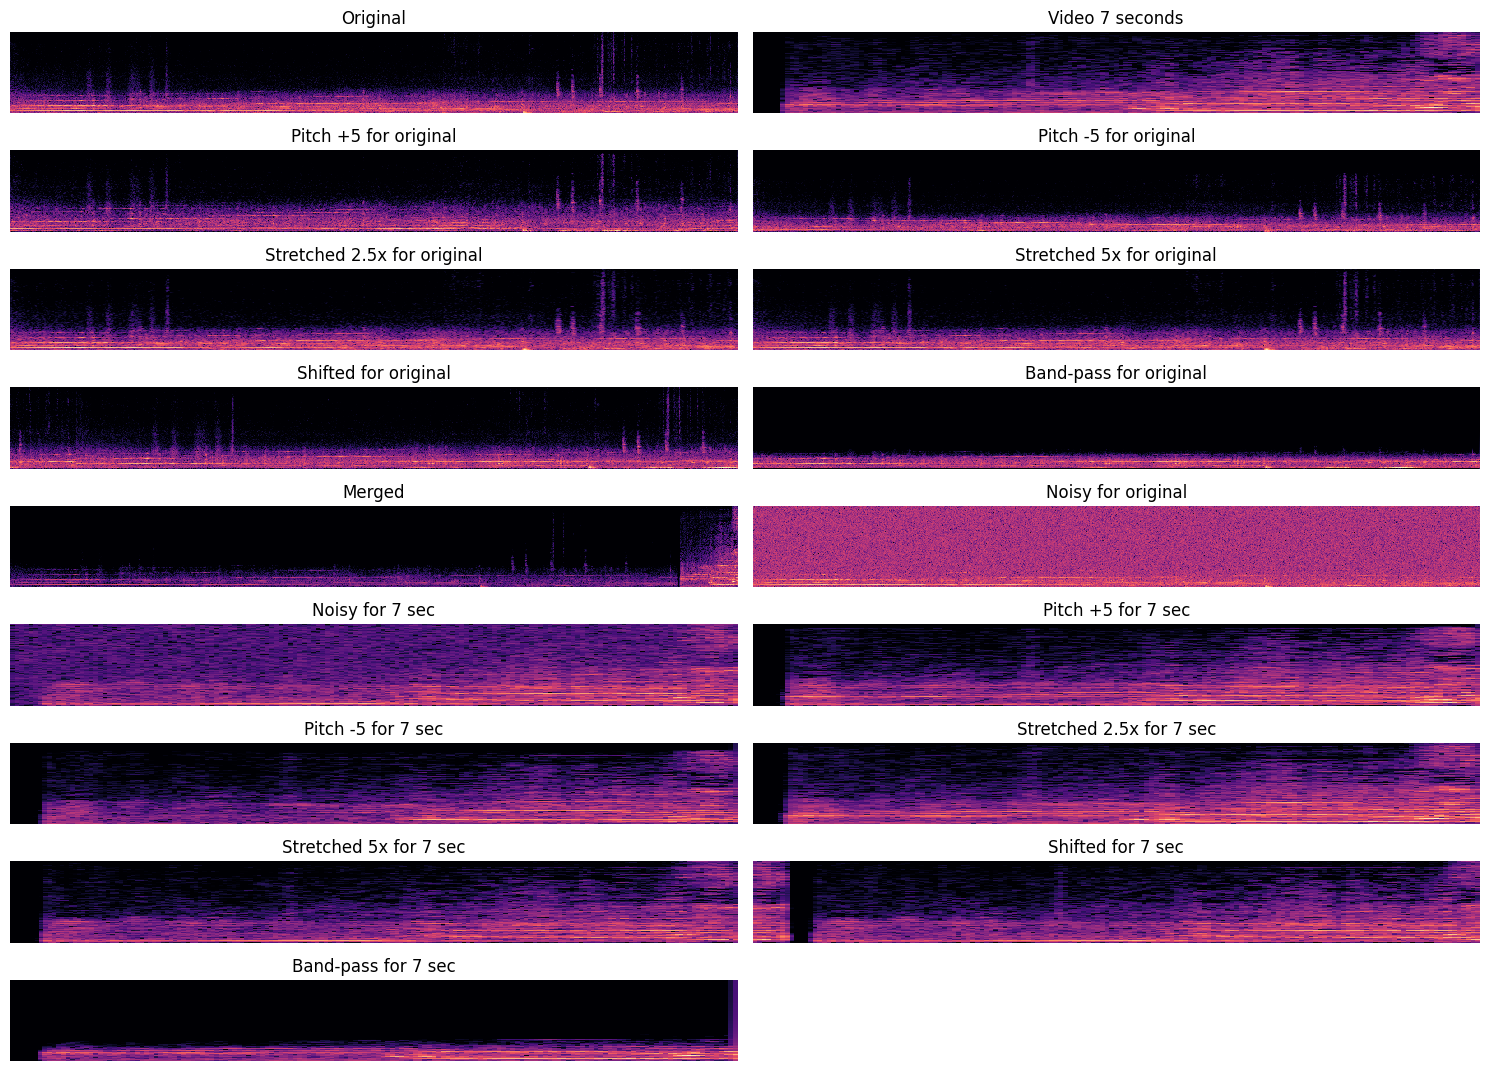

In [159]:
plt.figure(figsize=(15, 12))

for i, (audio, name) in enumerate(zip(augmented_samples, sample_names)):
    S = librosa.stft(audio)
    S_db = librosa.amplitude_to_db(abs(S), ref=np.max)

    plt.subplot(10, 2, i+1)  # adjust rows/cols if you add more
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
    plt.title(name)
    plt.axis("off")  # cleaner view

plt.tight_layout()
plt.show()